# Ayudantía Actividad 5
Importamos librerías a utilizar:

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx

## Misión 1

A continuación cargamos los archivos:

In [ ]:
df = pd.read_csv("DistritosRM.csv")
distritos = gpd.read_file('geoDistritosRM/geoDistritosRM.shp')
paradas = gpd.read_file('PO 02-03-2020 Paradas SerFrec/Shp/Shp/Paradas 020320.shp')

Visualizamos los Frames con el comando ``head``:

In [ ]:
df.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87


In [ ]:
distritos.head()

,CODIGO,geometry
0,1310101.0,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,1310102.0,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,1310103.0,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,1310104.0,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,1310105.0,"POLYGON ((343856.526 6298225.435, 344041.982 6..."


In [ ]:
paradas.head()

,ID,CODINFRA,SIMT,COMUNA,EJE,DESDECRUCE,HACIACRUCE,NOMBRE_PAR,X,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS,geometry
0,917,L-13-63-5-NS,PI317,MAIPÚ,MAIPÚ,CALETERA CAMINO A MELIPILLA,LAGO BRACCIANO,Central Poniente / esq. Lago Bracciano,333352.2096,6.285793e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (333352.210 6285793.364)
1,918,L-13-63-10-PO,PI307,MAIPÚ,MAIPÚ,LAS ARALIAS,LAGO DE COMO,Central Poniente / esq. Lago de Como,333556.9557,6.285602e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (333556.956 6285602.347)
2,941,L-13-61-10-OP,PI269,MAIPÚ,MAIPÚ,LIQUIDAMBAR 4,LAGO DE COMO,Central Oriente / esq. Lago de Como,333620.3706,6.285625e+06,0,NaN,None,35.0,3264.0,22.666667,2008.333333,6,111R;113I;113eI;113cI;350I;I11I,POINT (333620.371 6285624.741)
3,920,L-13-63-20-PO,PI309,MAIPÚ,MAIPÚ,EL CACTUS,LAGO CASTELGANDOLFO,Central Poniente / esq. Castelgandolfo,334004.8629,6.285199e+06,0,NaN,None,27.5,2482.0,31.000000,2856.333333,6,111I;113R;113eR;113cR;350R;I11R,POINT (334004.863 6285199.223)
4,939,L-13-61-20-OP,PI267,MAIPÚ,MAIPÚ,EL HELECHO NORTE,LAGO CASTELGANDOLFO,Central Oriente / esq. Castelgandolfo,334032.7925,6.285254e+06,0,NaN,None,35.0,3264.0,22.666667,2008.333333,6,111R;113I;113eI;113cI;350I;I11I,POINT (334032.792 6285254.391)


Antes de visualizar lo pedido, verifiquemos que las proyecciones de ambos GeoDataFrames sean iguales:

In [ ]:
distritos.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 72°W to 66°W - by country
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
paradas.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 72°W to 66°W - by country
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Ambos están en EPSG:32719, así que no hay problemas.

Visualizamos los distritos:

<AxesSubplot:>

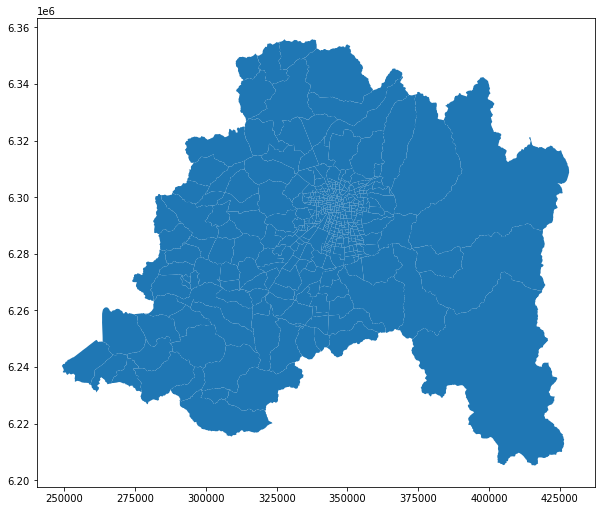

In [ ]:
distritos.plot(figsize = (10,10))

Visualizamos las paradas:

<AxesSubplot:>

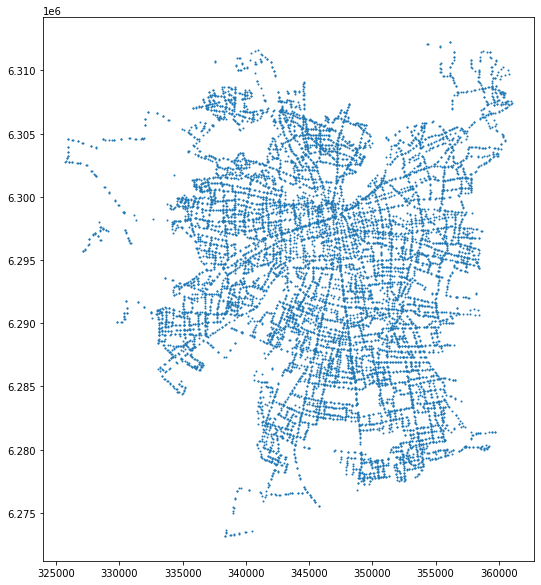

In [ ]:
paradas.plot(figsize = (10,10), markersize = 1)

Visualizamos ambas geometrías juntas:

<AxesSubplot:>

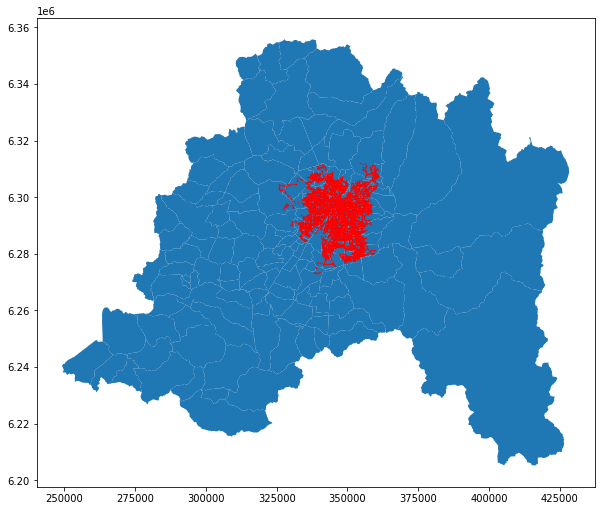

In [ ]:
ax = distritos.plot(figsize = (10,10))
paradas.plot(ax = ax, figsize = (10,10), color="red", markersize = 0.1)

## Misión 2

Integramos la información de ``distritos`` a ``df`` usando el método ``merge`` de pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) para hacer el *match* entre las columnas ``CODIGO``:

In [ ]:
df = df.merge(distritos, on='CODIGO')

In [ ]:
df.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6..."


Finalmente, convertimos el DataFrame en un GeoDataFrame (https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.html):

In [ ]:
df = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:32719')

In [ ]:
type(df)

geopandas.geodataframe.GeoDataFrame

# Misión 3
Primero vemos los puntos asociados a las paradas que pertenecen a los polígonos de los distritos usando ``sjoin``:

In [ ]:
dfparada = gpd.sjoin(df, paradas, op='intersects')
dfparada.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,Y,N_ET,N_ZP,ZPHORARIO,FREPMA,PLAZASPMA,FREPTA,PLAZASPTA,NSERVICIOS,SERVICIOS
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,6.299035e+06,ET03,NaN,None,35.0,4710.0,48.333333,6565.000000,10,106R;401R;405R;419R;421R;423R;481I;432NR;541NR...
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,6.299059e+06,ET03,NaN,None,20.5,2505.5,17.000000,1924.333333,5,412R;418R;D09NI;514R;515NR
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,6.299093e+06,ET03,NaN,None,41.0,5051.0,44.000000,5245.666667,6,504R;505R;508R;517R;502cR;B27R
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,6.298939e+06,0,NaN,None,52.0,6415.0,36.000000,4135.333333,6,504I;505I;508I;514I;517I;B02NI
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,6.298998e+06,ET03,NaN,None,45.0,5185.0,53.666667,6205.000000,6,116I;303I;303R;406R;407R;426R


A continuación, creamos un dataframe ``temp`` con columnas ``CODIGO`` y ``N_PARADAS`` que indica el número de paraderos por distrito. 

In [ ]:
temp = pd.DataFrame(dfparada["CODIGO"].value_counts())
temp.reset_index(inplace=True)
temp.rename(columns={"CODIGO": "N_PARADAS", "index": "CODIGO"}, inplace=True)
temp.head(5)

,CODIGO,N_PARADAS
0,1320105.0,160
1,1312406.0,144
2,1312502.0,121
3,1312504.0,117
4,1311501.0,105


Agregamos esta información al dataframe ``df``:

In [ ]:
df = df.merge(temp, on='CODIGO', how="outer")

In [ ]:
df["N_PARADAS"].isnull().sum()

105

In [ ]:
df["N_PARADAS"].fillna(0, inplace=True)
df["N_PARADAS"].isnull().sum()

0

Creamos la columna ``DPA`` en ``df`` que indica la densidad de paraderos por superficie. Para esto, basta con dividir la cantidad de paraderos por el área.

In [ ]:
df["DPA"] = df["N_PARADAS"] / df["Area"]
df.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,N_PARADAS,DPA
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",34.0,0.000048
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",37.0,0.000032
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6...",20.0,0.000039
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6...",27.0,0.000035
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6...",23.0,0.000030


Finalmente, visualizamos el indicador anterior para aquellos distritos cuyo valor por $m^2$ sea mayor que 1,7:

<AxesSubplot:>

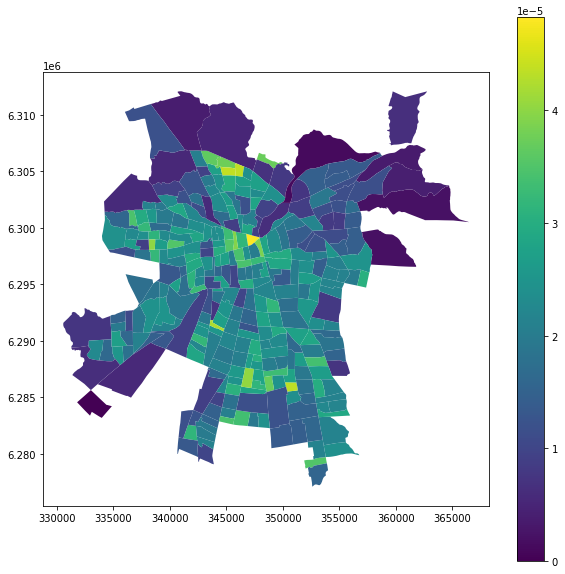

In [ ]:
dfFiltrado = df.loc[df['1_UF_M2'] > 1.7]
dfFiltrado.plot(column = 'DPA', figsize = (10,10), legend = True)

## Misión 4

Obtenemos los distritos que tienen paradas:

<AxesSubplot:>

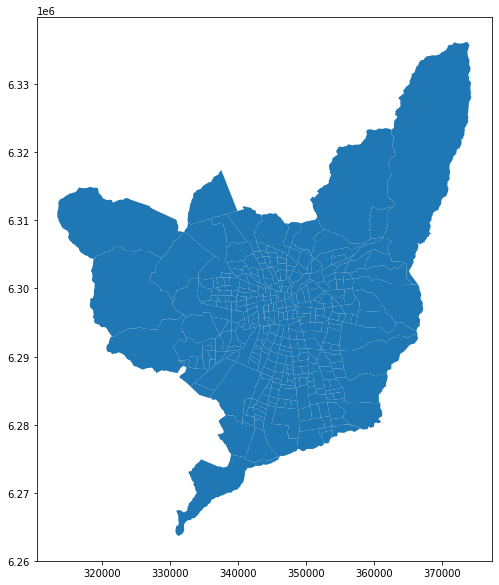

In [ ]:
distritos_paradas = df.loc[df['N_PARADAS'] > 0]
distritos_paradas.plot(figsize=(10,10))

Importante: Si se quieren obtener redes con ``osmnx`` a partir de un polígono, la proyección de este debe ser EPSG:4326, tal y como indican en https://osmnx.readthedocs.io/en/stable/osmnx.html (*...polygon (shapely.geometry.Polygon or shapely.geometry.MultiPolygon) – the shape to get network data within. coordinates should be in unprojected latitude-longitude degrees (EPSG:4326)...*).

In [ ]:
distritos_paradas.to_crs("EPSG:4326", inplace=True)

c:\users\matia\appdata\local\programs\python\python36\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


El método ``osmnx.graph.graph_from_polygon``, como se indica arriba también, recibe un Polygon o MultiPolygon, mientras que ``distritos_paradas`` tiene muchos Polygon. Formamos solo un gran polígono a partir de todos los polígonos:

In [ ]:
poligono = distritos_paradas.dissolve(by="NOM_REG")

Visualicemos qué es lo que se obtiene:

<AxesSubplot:>

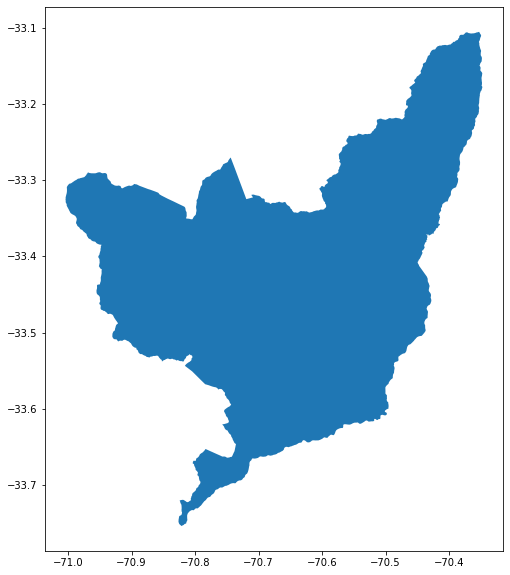

In [ ]:
poligono.plot(figsize = (10,10))

Obtenemos la red primaria-secundaria de la geometría anterior y la visualizamos:

In [ ]:
red_ps = ox.graph.graph_from_polygon(poligono.geometry.item(), custom_filter = '["highway"~"primary|secondary"]')

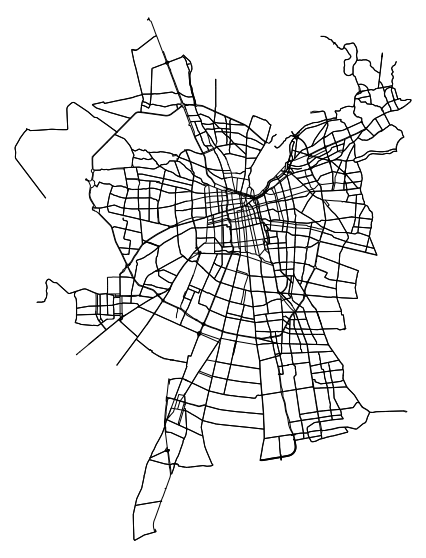

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [ ]:
ox.plot_graph(red_ps, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

Guardamos la red en un shape para luego graficar junto con los distritos:

In [ ]:
ox.save_graph_shapefile(red_ps)

c:\users\matia\appdata\local\programs\python\python36\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [ ]:
df_nodos_ps = gpd.read_file('data/graph_shapefile/nodes.shp')
df_arcos_ps = gpd.read_file('data/graph_shapefile/edges.shp')

<AxesSubplot:>

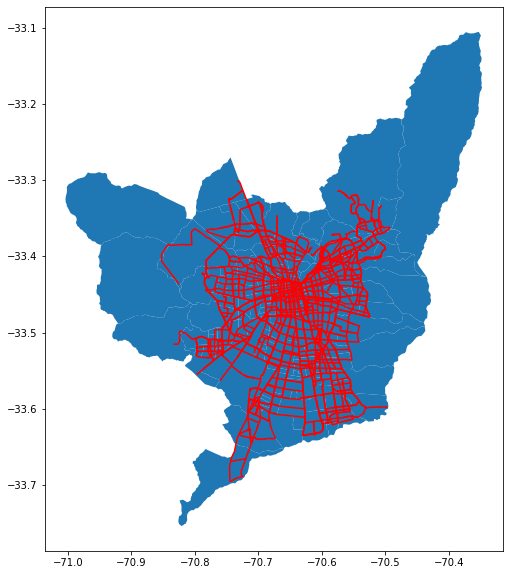

In [ ]:
ax = distritos_paradas.plot(figsize = (10,10))
df_arcos_ps.plot(ax = ax, figsize = (10,10), color = 'red')

Hacemos exactamente lo mismo, pero para la red primaria-secundaria-terciaria:

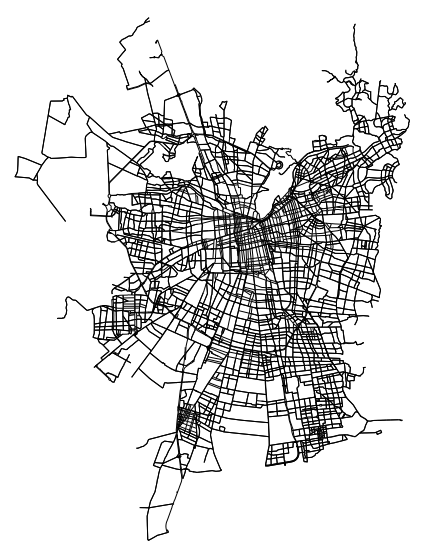

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [ ]:
red_pst = ox.graph.graph_from_polygon(poligono.geometry.item(), custom_filter = '["highway"~"primary|secondary|tertiary"]')
ox.plot_graph(red_pst, figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

c:\users\matia\appdata\local\programs\python\python36\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


<AxesSubplot:>

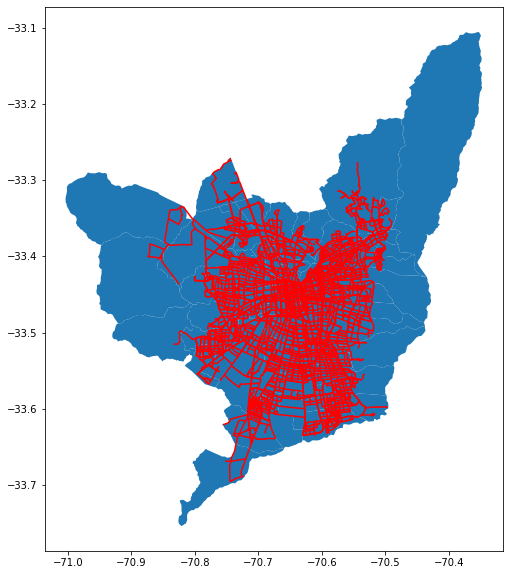

In [ ]:
ox.save_graph_shapefile(red_pst)
df_nodos_pst = gpd.read_file('data/graph_shapefile/nodes.shp')
df_arcos_pst = gpd.read_file('data/graph_shapefile/edges.shp')
ax = distritos_paradas.plot(figsize = (10,10))
df_arcos_pst.plot(ax = ax, figsize = (10,10), color = 'red')

## Misión 5

Obtenemos los centroides y los graficamos junto a los distritos:

In [ ]:
distritos_paradas["centroides"] = distritos_paradas.geometry.centroid

c:\users\matia\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
c:\users\matia\appdata\local\programs\python\python36\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

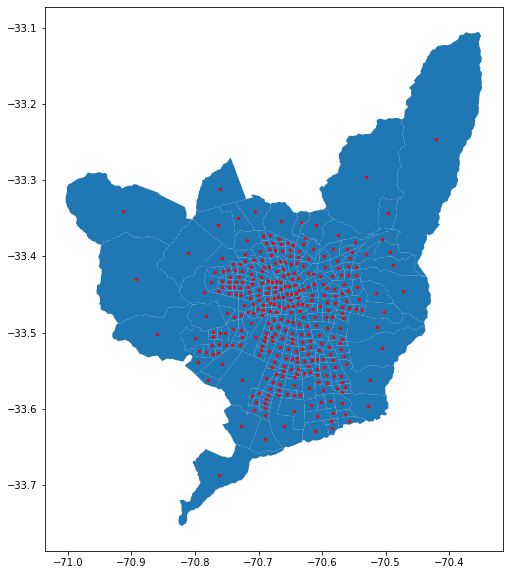

In [ ]:
ax = distritos_paradas.plot(figsize = (10,10))
distritos_paradas["centroides"].plot(ax = ax, figsize = (10,10), color = 'red', markersize = 5)

Obtenemos las proporciones de interés para cada distrito:

In [ ]:
distritos_paradas["E/T"] = distritos_paradas["E"] / distritos_paradas["ADIMARK_T"]
distritos_paradas["ABC1/T"] = distritos_paradas["ABC1"] / distritos_paradas["ADIMARK_T"]

c:\users\matia\appdata\local\programs\python\python36\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


Obtenemos las máximas proporciones para luego identificar los distritos con esa condición:

In [ ]:
max_et = distritos_paradas["E/T"].max()
max_abc1t = distritos_paradas["ABC1/T"].max()

In [ ]:
distritos_paradas[distritos_paradas["E/T"] == max_et]

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,N_PARADAS,DPA,centroides,E/T,ABC1/T
348,Región Metropolitana De Santiago,133,Chacabuco,13302,Lampa,Lipangue,1330205.0,138.0,209.0,67.0,...,436.0,125560641.0,0.03,0.33,"POLYGON ((-70.93881 -33.29206, -70.93870 -33.2...",2.0,1.592856e-08,POINT (-70.91323 -33.34002),0.316514,0.0


In [ ]:
distritos_paradas[distritos_paradas["ABC1/T"] == max_abc1t]

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,N_PARADAS,DPA,centroides,E/T,ABC1/T
137,Región Metropolitana De Santiago,131,Santiago,13113,La Reina,La Reina,1311306.0,4.0,49.0,183.0,...,1753.0,9710979.42,1.81,2.25,"POLYGON ((-70.53462 -33.44134, -70.53487 -33.4...",19.0,0.000002,POINT (-70.51428 -33.44783),0.002282,0.584712


Obtenemos ruta mínima entre los distritos usando sus centroides para la red primaria-secundaria y graficamos:

Largo de ruta: 38920.54199999999


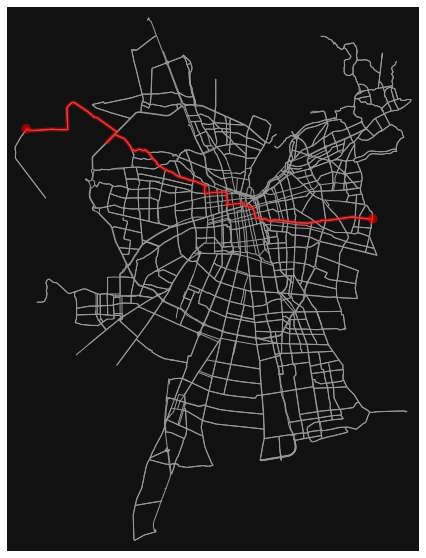

In [ ]:
orig_node = ox.distance.nearest_nodes(red_ps, -70.91323, -33.34002)
dest_node = ox.distance.nearest_nodes(red_ps, -70.51428, -33.44783)

route_ps = nx.shortest_path(red_ps, orig_node, dest_node, weight = 'length')
cost_ps = nx.shortest_path_length(red_ps, orig_node, dest_node, weight = 'length')
print(f"Largo de ruta: {cost_ps}")
fig, ax = ox.plot_graph_route(red_ps, route_ps, node_size = 0, figsize=(10,10))

Obtenemos ruta mínima entre los distritos usando sus centroides para la red primaria-secundaria-terciaria y graficamos:

Largo de ruta: 38686.97400000001


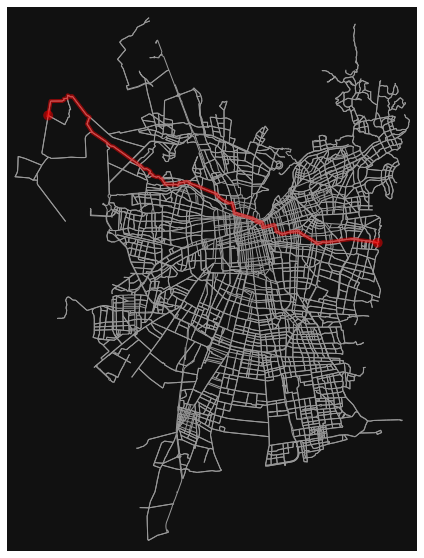

In [ ]:
orig_node = ox.distance.nearest_nodes(red_pst, -70.91323, -33.34002)
dest_node = ox.distance.nearest_nodes(red_pst, -70.51428, -33.44783)

route_pst = nx.shortest_path(red_pst, orig_node, dest_node, weight = 'length')
cost_pst = nx.shortest_path_length(red_pst, orig_node, dest_node, weight = 'length')
print(f"Largo de ruta: {cost_pst}")
fig, ax = ox.plot_graph_route(red_pst, route_pst, node_size = 0, figsize=(10,10))